In [1]:
from aivis.tools.wrap import SegWrapper
import tensorflow as tf
from aivis.base.mlog import initlog
import matplotlib.pylab as plt
%matplotlib inline

Instructions for updating:
Use the retry module or similar alternatives.


In [2]:
initlog()

In [3]:
with tf.Graph().as_default() as graph:
    seg = SegWrapper(config_file="/home/steven/proj/steven/2018-nuclei/experiments/unet-3-256/net.yaml",
                    checkpoint_file="/home/steven/proj/steven/2018-nuclei/log/unet-3-256/20180418-120415/best/model.ckpt-495",
                    original_image_shape=[296,296,3], graph=graph)

[04/18/18 14:05:50(4393)] INFO	parse model config: /home/steven/proj/steven/2018-nuclei/experiments/unet-3-256/net.yaml
[04/18/18 14:05:50(4395)] INFO	config content is: 

name: 2018-nuclei
category: segmentation

debug: False

inputs:
  image:
    shape: [296, 296, 3]
    colorspace: RGB
    preprocess:
      - center_crop:
      #- channel_mean: [137.49, 134.30, 132.36]
      - scale_by_div: 255.0
  label:
    n_classes: 2

params:
  - is_training: $$ tf.placeholder_with_default(False, shape=[]) $$
  - first_keep_prob: $$ tf.placeholder_with_default(1.0, shape=[]) $$
  - second_keep_prob: $$ tf.placeholder_with_default(1.0, shape=[]) $$

network:
  - input: image
  - { subnet: UNet,
      n_channels: 3, n_classes: $ n_classes $, n_layers: 3, is_training: $ is_training $, keep_prob: $ second_keep_prob $, padding: "VALID" }

outputs:
  inference: softmax
  loss: logloss
  pred: argmax

[04/18/18 14:05:50(4407)] INFO	{'first_keep_prob': <tf.Tensor 'PlaceholderWithDefault:0' shape=() dty

INFO:tensorflow:Restoring parameters from /home/steven/proj/steven/2018-nuclei/log/unet-3-256/20180418-120415/best/model.ckpt-495


[04/18/18 14:05:52(6485)] INFO	Restoring parameters from /home/steven/proj/steven/2018-nuclei/log/unet-3-256/20180418-120415/best/model.ckpt-495


In [3]:
with tf.Graph().as_default() as graph:
    seg = SegWrapper(config_file="/home/steven/proj/steven/2018-nuclei/experiments/unet-3-256/net.yaml",
                    checkpoint_file="/home/steven/proj/steven/2018-nuclei/log/unet-3-256/20180418-163919/best/model.ckpt-12400",
                    original_image_shape=[256,256,3], graph=graph)

[04/19/18 00:03:38(68505)] INFO	parse model config: /home/steven/proj/steven/2018-nuclei/experiments/unet-3-256/net.yaml
[04/19/18 00:03:38(68519)] INFO	config content is: 

name: 2018-nuclei
category: segmentation

debug: False

inputs:
  image:
    shape: [256, 256, 3]
    colorspace: RGB
    preprocess:
      - center_crop:
      #- channel_mean: [137.49, 134.30, 132.36]
      - scale_by_div: 255.0
  label:
    n_classes: 2

params:
  - is_training: $$ tf.placeholder_with_default(False, shape=[]) $$
  - first_keep_prob: $$ tf.placeholder_with_default(1.0, shape=[]) $$
  - second_keep_prob: $$ tf.placeholder_with_default(1.0, shape=[]) $$

network:
  - input: image
  - { subnet: UNet,
      n_channels: 3, n_classes: $ n_classes $, n_layers: 5, is_training: $ is_training $, keep_prob: $ second_keep_prob $, padding: "SAME" }

outputs:
  inference: softmax
  loss: logloss
  pred: argmax

[04/19/18 00:03:38(68532)] INFO	{'first_keep_prob': <tf.Tensor 'PlaceholderWithDefault:0' shape=() d

Layer 5, 8
Layer 5, 20


[04/19/18 00:03:38(68911)] INFO	to_op.shape: (?, 64, 64, 256)
[04/19/18 00:03:38(68912)] INFO	crop_and_concat, x1.shape: [None, 64, 64, 256], x2.shape: [None, 64, 64, 256]
[04/19/18 00:03:38(68918)] INFO	to_op.shape: (?, 64, 64, 512)
[04/19/18 00:03:38(68961)] INFO	to_op.shape: (?, 128, 128, 128)
[04/19/18 00:03:38(68962)] INFO	crop_and_concat, x1.shape: [None, 128, 128, 128], x2.shape: [None, 128, 128, 128]
[04/19/18 00:03:38(68972)] INFO	to_op.shape: (?, 128, 128, 256)
[04/19/18 00:03:38(69032)] INFO	to_op.shape: (?, 256, 256, 64)
[04/19/18 00:03:38(69032)] INFO	crop_and_concat, x1.shape: [None, 256, 256, 64], x2.shape: [None, 256, 256, 64]
[04/19/18 00:03:38(69037)] INFO	to_op.shape: (?, 256, 256, 128)
[04/19/18 00:03:38(69075)] INFO	C-0-conv2d-1, shape: (?, 256, 256, 64)
[04/19/18 00:03:38(69076)] INFO	C-0-conv2d-2, shape: (?, 256, 256, 64)
[04/19/18 00:03:38(69077)] INFO	C-0-maxpool, shape: (?, 128, 128, 64)
[04/19/18 00:03:38(69077)] INFO	C-1-conv2d-1, shape: (?, 128, 128, 128)
[

INFO:tensorflow:Restoring parameters from /home/steven/proj/steven/2018-nuclei/log/unet-3-256/20180418-163919/best/model.ckpt-12400


[04/19/18 00:03:40(70921)] INFO	Restoring parameters from /home/steven/proj/steven/2018-nuclei/log/unet-3-256/20180418-163919/best/model.ckpt-12400


In [4]:
import glob
import os
import numpy as np
import logging
import cv2
import math
import cPickle as pickle
import matplotlib.pylab as plt
import gc

from tf_unet import image_gen
from tf_unet import unet
from tf_unet import util
from tf_unet import image_util

def get_dataset(pkl_fname):
    with open(pkl_fname, "rb") as f:
        ds = pickle.load(f)

    n_parts = sum(len(v) for v in ds.values())
    logging.info("n_parts: %d", n_parts)

    images = []
    masks = []

    n_err = 0
    for key, value in ds.items():
        for i, d in enumerate(value):
            if np.max(d['img']) == 0:
                logging.info('skip: %s, # %s', key, i)
                n_err += 1
                continue
            images.append(d['img'])
            masks.append(d['mask'])

    images = np.array(images)
    masks = np.array(masks, dtype=np.uint8)
    # images = scipy.sparse.csr_matrix(images, dtype=np.float32)
    # masks = scipy.sparse.csr_matrix(masks, dtype=np.bool)
    # max_v = np.max(images)
    # if max_v > 0.0:
    #     images /= max_v

    del ds
    logging.info("valid images: #%d, err: #%d", len(images), n_err)
    return images, masks

def padding_array(ary, offset, default_val):
    logging.info("ary.shape: %s", ary.shape)
    gc.collect()
    p1 = offset/2
    p2 = offset - p1

    psize = [(p1, p2),(p1, p2)]
    if len(ary.shape) == 3:
        psize.insert(0, (0, 0))
    elif len(ary.shape) == 4:
        psize.insert(0, (0, 0))
        psize.append((0, 0))

    logging.info("psize: %s", psize)
    ary_padded = np.pad(ary, psize, "constant", constant_values=default_val)

    return ary_padded



def unet_size(s, L):
    s0 = s
    for i in range(L - 1):
        s = (s - 4) / 2
        print("layer %d, %d" % (i + 1, s))
    s -= 4
    print("Layer %d, %d" % (L, s))
    for i in range(L - 2, -1, -1):
        s = s * 2 - 4
        print("Layer %d, %d" % (i + 1, s))

    return s, s0 - s


In [5]:
np.random.seed(12345)
LAYERS = 3
pkl_fname = "../../data/preprocess/stage1_train_set_rgb.pkl"
images, masks = get_dataset(pkl_fname)
logging.info("read train set: %s, %s", images.shape, masks.shape)
logging.info("image:[%s, %s], mask:[%s, %s]", np.max(images), np.min(images), np.max(masks), np.min(masks))

# pred_size, offset = unet_size(256, LAYERS)
# logging.info("pred_size: %d, offset: %d", pred_size, offset)
# images = padding_array(images, offset, default_val=0.0)
# masks = padding_array(masks, offset, default_val=False)
# logging.info("shape after padded: %s, %s", images.shape, masks.shape)


[04/19/18 00:04:35(125817)] INFO	n_parts: 2224
[04/19/18 00:04:35(125908)] INFO	skip: 20b20ab049372d184c705acebe7af026d3580f5fd5a72ed796e3622e1685af2f, # 3
[04/19/18 00:04:35(125909)] INFO	skip: 20b20ab049372d184c705acebe7af026d3580f5fd5a72ed796e3622e1685af2f, # 4
[04/19/18 00:04:35(125910)] INFO	skip: 20b20ab049372d184c705acebe7af026d3580f5fd5a72ed796e3622e1685af2f, # 8
[04/19/18 00:04:35(125911)] INFO	skip: 20b20ab049372d184c705acebe7af026d3580f5fd5a72ed796e3622e1685af2f, # 9
[04/19/18 00:04:35(125912)] INFO	skip: 20b20ab049372d184c705acebe7af026d3580f5fd5a72ed796e3622e1685af2f, # 13
[04/19/18 00:04:35(125913)] INFO	skip: 20b20ab049372d184c705acebe7af026d3580f5fd5a72ed796e3622e1685af2f, # 14
[04/19/18 00:04:35(125915)] INFO	skip: a102535b0e88374bea4a1cfd9ee7cb3822ff54f4ab2a9845d428ec22f9ee2288, # 0
[04/19/18 00:04:35(125916)] INFO	skip: a102535b0e88374bea4a1cfd9ee7cb3822ff54f4ab2a9845d428ec22f9ee2288, # 5
[04/19/18 00:04:35(125918)] INFO	skip: a102535b0e88374bea4a1cfd9ee7cb3822ff54f4

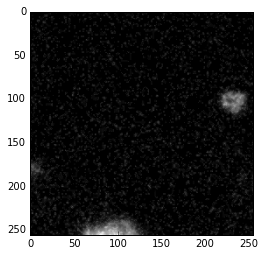

In [6]:
plt.imshow((images[-1]/50.0))

In [7]:
np.max(images[-1])

50

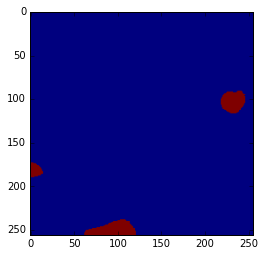

In [8]:
plt.imshow(masks[-1])

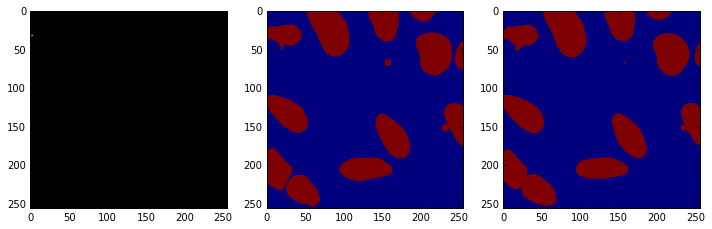

In [33]:
idx = -90
fig, ax = plt.subplots(1, 3, figsize=(12,5))
ax[0].imshow((images[idx]/np.max(images[idx]))*255)
ax[1].imshow(masks[idx])
a = seg.infer_one(images[idx])[0]
a = np.argmax(a, axis=2)*255
ax[2].imshow(a)

In [45]:
images[idx].shape

(296, 296, 3)

In [35]:
import tensorflow.contrib.slim as slim

In [36]:
?slim.batch_norm

In [37]:
def fn(a, b, c):
    return a+b+c

In [40]:
args = {'b': 10, 'c':5}
fn(a=10, **args)

25